In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap
from common_functions import remove_unit_variance
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from plot_utils import combined_rolling_average_and_model_fit, combined_sliding_window_and_model_fit_split_col


In [2]:
scaler = StandardScaler()

df = pd.read_csv('pilot6.csv')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


In [3]:
df['pilot_number']

0        2
1        2
2        2
3        2
4        2
        ..
40699    2
40700    2
40701    2
40702    2
40703    2
Name: pilot_number, Length: 40704, dtype: int64

In [4]:
# df_correct

In [5]:
df_correct = df[df['resp_correct'] == 1]


In [6]:
sns.set_context('notebook')

In [7]:
blue = '#90BDEC'
gray = '#BFBFBF'

# Create a palette list
palette = [blue, gray]
sns.set_palette(palette)  # Set as default palette


In [8]:
df['it_pos_neg'] =  np.where(df['it_sim_dis_diff_test'] <= 0, 0, 1)
df['v2_pos_neg'] =  np.where(df['v2_sim_dis_diff_test'] <= 0, 0, 1)


In [9]:
df_correct = df[df['resp_correct'] == 1]

#this approach here seems more correct
df_correct['wm_rt'] = np.log(df_correct['mouse.time_last'])
df_correct = remove_unit_variance(df_correct,'wm_rt', 'participant')
df_correct['WM RT'] = df_correct['wm_rt_within']


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/4100860242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct['wm_rt'] = np.log(df_correct['mouse.time_last'])


In [10]:
df_incorrect = df[~df['mouse.clicked_name'].apply(lambda x: "memoranda_stim" in x)]
df_wth = df_incorrect[df_incorrect['resp_correct'] == 1]
df_wth['mouse.clicked_name']

Series([], Name: mouse.clicked_name, dtype: object)

In [11]:
df_cleaned = df[df['mouse.clicked_name'].astype(str).apply(lambda x: x != '[]')]
df_cleaned

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,v2_int_rel,it_int_rel_sq,v2_int_rel_sq,pilot_number,tested_memorability_resmem,untested_memorability_resmem,attended_memorability_resmem,unattended_memorability_resmem,distractor_memorability,tested_memorability_resmem_z
0,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,1.624451,-1.103825,1.803056,2,0.898656,0.901516,0.901516,0.898656,0.888886,0.862274
1,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,1.488172,0.535940,1.336369,2,0.956127,0.883206,0.956127,0.883206,0.871632,1.572388
2,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,-1.343845,0.849721,0.886676,2,0.917059,0.843608,0.917059,0.843608,0.873370,1.089653
3,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,0.095861,0.838234,1.090093,2,0.783997,0.887844,0.783997,0.887844,0.941604,-0.554476
4,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,-1.473997,1.089747,-1.290173,2,0.916007,0.884664,0.916007,0.884664,0.922820,1.076657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40699,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,-0.086200,1.689067,1.092028,2,0.923335,0.885718,0.885718,0.923335,0.944206,1.167208
40700,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.775402,-0.620326,-0.438708,2,0.807225,0.876328,0.807225,0.876328,0.845075,-0.267465
40701,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,-0.977435,-0.582268,-0.049091,2,0.913835,0.791587,0.791587,0.913835,0.897957,1.049817
40702,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.788807,-0.509991,-0.415639,2,0.872645,0.911552,0.872645,0.911552,0.927109,0.540873


In [12]:

df_cleaned = df_cleaned[df_cleaned['resp_correct'] != 1]

# Check the results
original_count = len(df)
cleaned_count = len(df_cleaned)
removed_count = original_count - cleaned_count

print(f"Original DataFrame: {original_count} rows")
print(f"Cleaned DataFrame: {cleaned_count} rows")
print(f"Removed {removed_count} rows ({(removed_count/original_count)*100:.2f}% of data)")

# Optional: Reset the index of the cleaned DataFrame
df_cleaned = df_cleaned.reset_index(drop=True)

Original DataFrame: 40704 rows
Cleaned DataFrame: 8863 rows
Removed 31841 rows (78.23% of data)


In [13]:
# Create a more robust function to extract the last entry
def get_last_entry(x):
    # If it's a string representation of a list like "['memoranda_stim']"
    if isinstance(x, str) and x.startswith('[') and x.endswith(']'):
        try:
            # Try to evaluate the string as a Python list
            import ast
            parsed_list = ast.literal_eval(x)
            if isinstance(parsed_list, list) and len(parsed_list) > 0:
                return parsed_list[-1]
        except:
            pass
    
    # If it's already a list
    if isinstance(x, list) and len(x) > 0:
        return x[-1]
    
   
    return None

df_cleaned['last_clicked'] = df_cleaned['mouse.clicked_name'].apply(get_last_entry)

# Check for empty entries
empty_count = df_cleaned['last_clicked'].isna().sum()
print(f"Number of rows with empty last_clicked: {empty_count}")

# Check for memoranda_stim as last click
mem_stim_count = (df_cleaned['last_clicked'] == "memoranda_stim").sum()
print(f"Number of rows where last click was memoranda_stim: {mem_stim_count}")

# Check for rows where resp_correct is 1
correct_count = (df_cleaned['resp_correct'] == 1).sum()
print(f"Number of rows where resp_correct is 1: {correct_count}")

# Analyze cases where last click is memoranda_stim but resp_correct is not 1
inconsistent_mem = df_cleaned[(df_cleaned['last_clicked'] == "memoranda_stim") & (df_cleaned['resp_correct'] != 1)]
print(f"Number of rows where last click was memoranda_stim but resp_correct != 1: {len(inconsistent_mem)}")

# Analyze cases where last click is not memoranda_stim but resp_correct is 1
inconsistent_non_mem = df_cleaned[(df_cleaned['last_clicked'] != "memoranda_stim") & (df_cleaned['resp_correct'] == 1)]
# print(f"Number of rows where last click was NOT memoranda_stim but resp_correct = 1: {len(inconsistent_non_mem)}")

# # Display a few examples of each inconsistent case if they exist
# if len(inconsistent_mem) > 0:
#     print("\nExamples where last click was memoranda_stim but resp_correct != 1:")
#     print(inconsistent_mem[['mouse.clicked_name', 'last_clicked', 'resp_correct']].head(3))

# if len(inconsistent_non_mem) > 0:
#     print("\nExamples where last click was NOT memoranda_stim but resp_correct = 1:")
#     print(inconsistent_non_mem[['mouse.clicked_name', 'last_clicked', 'resp_correct']].head(3))

Number of rows with empty last_clicked: 0
Number of rows where last click was memoranda_stim: 0
Number of rows where resp_correct is 1: 0
Number of rows where last click was memoranda_stim but resp_correct != 1: 0


In [14]:
df_cleaned = df_cleaned[df_cleaned['last_clicked'] != 'memoranda_stim']
df_cleaned

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,v2_int_rel,it_int_rel_sq,v2_int_rel_sq,pilot_number,tested_memorability_resmem,untested_memorability_resmem,attended_memorability_resmem,unattended_memorability_resmem,distractor_memorability,tested_memorability_resmem_z
0,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,1.488172,0.535940,1.336369,2,0.956127,0.883206,0.956127,0.883206,0.871632,1.572388
1,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,-0.934450,-1.569883,0.139509,2,0.550279,0.771194,0.550279,0.771194,0.843337,-3.442326
2,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,0.721903,-0.826522,0.526839,2,0.810434,0.881437,0.810434,0.881437,0.964797,-0.227811
3,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,1.283990,-1.605286,-0.713626,2,0.733317,0.923204,0.923204,0.733317,0.885329,-1.180679
4,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,1.362349,-1.572394,-0.941767,2,0.861213,0.955785,0.861213,0.955785,0.898082,0.399613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,-0.297846,1.591547,-1.002602,2,0.911266,0.937998,0.937998,0.911266,0.861497,1.018083
8859,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.345625,0.259857,0.968777,2,0.898166,0.887073,0.898166,0.887073,0.714080,0.856214
8860,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.318310,0.514965,0.988729,2,0.826572,0.580719,0.826572,0.580719,0.832514,-0.028408
8861,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,-0.977435,-0.582268,-0.049091,2,0.913835,0.791587,0.791587,0.913835,0.897957,1.049817


In [15]:
# Create a function that determines the category based on the conditions
def determine_category(row):
    if pd.isna(row['last_clicked']):
        return 'no_click'
    
    # Check if clicked on memoranda_stim
    if row['last_clicked'] == 'memoranda_stim':
        return 'target'
    
    # Check if clicked on distractor_mem_stim
    if row['last_clicked'] == 'distractor_mem_stim':
        return 'memory_distractor'### 
    
    # For image distractors, determine if it was correct category or wrong category
    if row['test_item'] == 'img1':
        if row['last_clicked'] in ['distractor_im_0', 'distractor_im_1']:
            return 'correct_category'
        elif row['last_clicked'] in ['distractor_im_2', 'distractor_im_3']:
            return 'wrong_category'
    elif row['test_item'] == 'img2':
        if row['last_clicked'] in ['distractor_im_0', 'distractor_im_1']:
            return 'wrong_category'
        elif row['last_clicked'] in ['distractor_im_2', 'distractor_im_3']:
            return 'correct_category'
    
    # Default case
    return 'other'


# Apply the function to create the new column
df_cleaned['last_clicked_category'] = df_cleaned.apply(determine_category, axis=1)

# Check the results
category_counts = df_cleaned['last_clicked_category'].value_counts()
print(category_counts)

last_clicked_category
correct_category     5393
memory_distractor    2174
wrong_category       1296
Name: count, dtype: int64


In [16]:

df_cleaned['WM Choice Category'] = np.where(
    df_cleaned['last_clicked_category'] == 'correct_category',
    'correct category',
    'wrong category'
)
df_cleaned['wm_category'] = df_cleaned['WM Choice Category']

df_cleaned['WM Untested Chosen'] = np.where(
    df_cleaned['last_clicked_category'] == 'memory_distractor',
    'True',
    'False'
)
df_cleaned['wm_untested_choice'] = df_cleaned['WM Untested Chosen']


df_cleaned['wm_untested_choice_num'] =  np.where(
    df_cleaned['wm_untested_choice'] == "True", 1,0 )
df_cleaned['wm_untested_choice_num'].unique()

df_cleaned['WM Untested Chosen - Numerical'] = df_cleaned['wm_untested_choice_num']


In [17]:
df_cleaned['wm_untested_choice_num']

0       0
1       0
2       0
3       1
4       1
       ..
8858    0
8859    0
8860    0
8861    0
8862    1
Name: wm_untested_choice_num, Length: 8863, dtype: int64

In [18]:
# Calculate percentages within incorrect responses
total_incorrect = len(df_cleaned)
error_percentages = df_cleaned['last_clicked_category'].value_counts(normalize=True) * 100
print("Error type percentages within incorrect responses:")
print(error_percentages)

# Create a more detailed breakdown
print("\nDetailed breakdown of error types:")
for category in error_percentages.index:
    count = df_cleaned['last_clicked_category'].value_counts()[category]
    percentage = error_percentages[category]
    print(f"{category}: {count} responses ({percentage:.2f}% of all incorrect responses)")

# Analyze by WM Choice Category (simplified grouping)
wm_percentages = df_cleaned['WM Choice Category'].value_counts(normalize=True) * 100
print("\nSimplified categorization percentages:")
for category in wm_percentages.index:
    count = df_cleaned['WM Choice Category'].value_counts()[category]
    percentage = wm_percentages[category]
    print(f"{category}: {count} responses ({percentage:.2f}% of all incorrect responses)")

Error type percentages within incorrect responses:
last_clicked_category
correct_category     60.848471
memory_distractor    24.528941
wrong_category       14.622588
Name: proportion, dtype: float64

Detailed breakdown of error types:
correct_category: 5393 responses (60.85% of all incorrect responses)
memory_distractor: 2174 responses (24.53% of all incorrect responses)
wrong_category: 1296 responses (14.62% of all incorrect responses)

Simplified categorization percentages:
correct category: 5393 responses (60.85% of all incorrect responses)
wrong category: 3470 responses (39.15% of all incorrect responses)


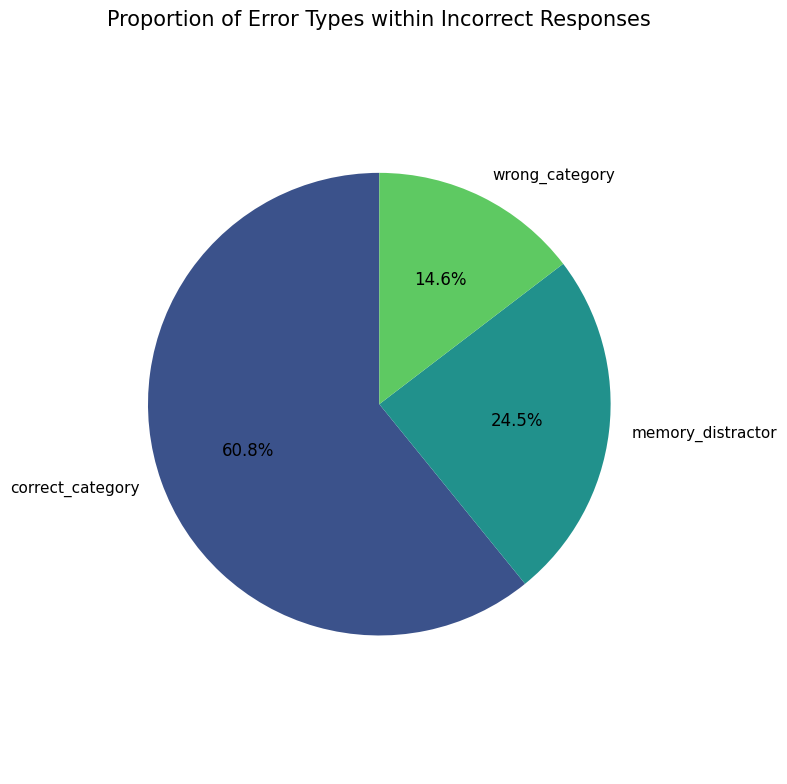

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/3588713274.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=wm_percentages.index, y=wm_percentages.values, palette="Set2")


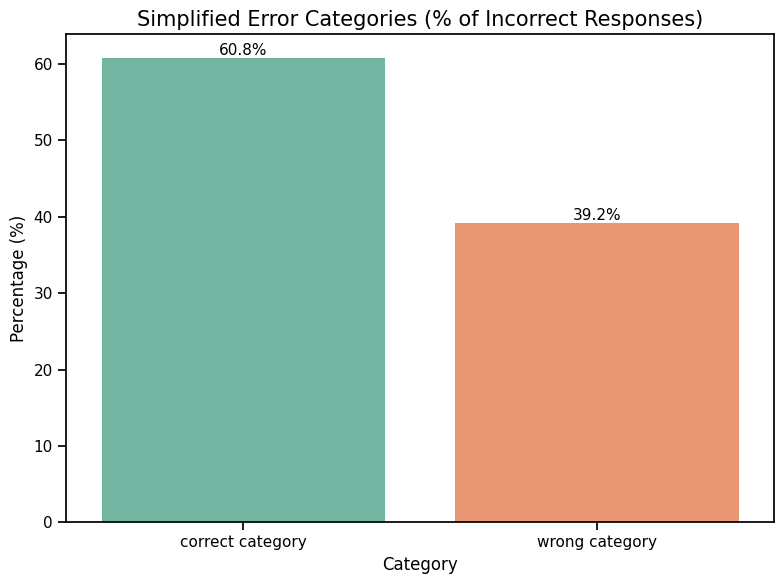

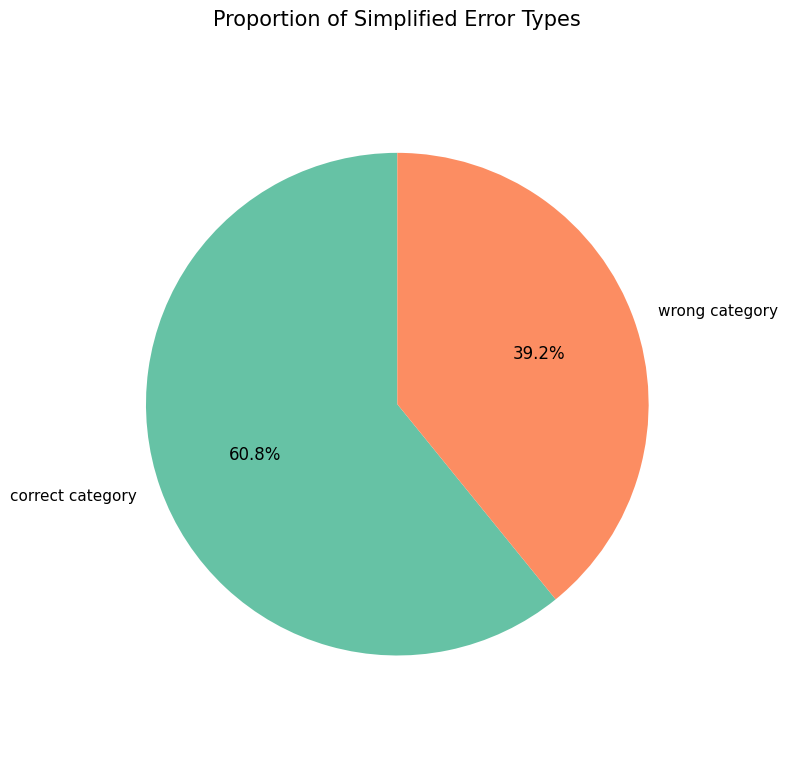

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(error_percentages.values, labels=error_percentages.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette("viridis", len(error_percentages)))
plt.title('Proportion of Error Types within Incorrect Responses', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# If we have the simplified WM Choice Category, visualize that as well
if 'WM Choice Category' in df_cleaned.columns:
    wm_percentages = df_cleaned['WM Choice Category'].value_counts(normalize=True) * 100
    
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=wm_percentages.index, y=wm_percentages.values, palette="Set2")
    plt.title('Simplified Error Categories (% of Incorrect Responses)', fontsize=15)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    
    # Add percentage labels on top of each bar
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Pie chart for simplified categories
    plt.figure(figsize=(8, 8))
    plt.pie(wm_percentages.values, labels=wm_percentages.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette("Set2", len(wm_percentages)))
    plt.title('Proportion of Simplified Error Types', fontsize=15)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

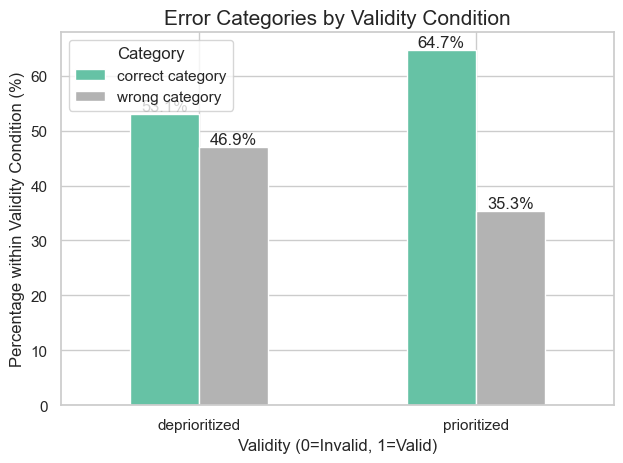

<Figure size 1000x600 with 0 Axes>

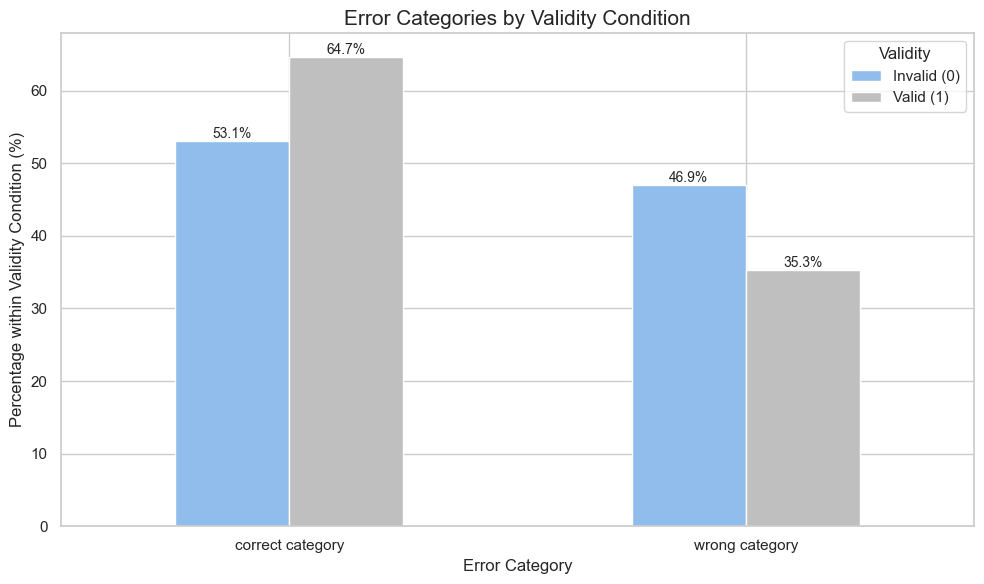

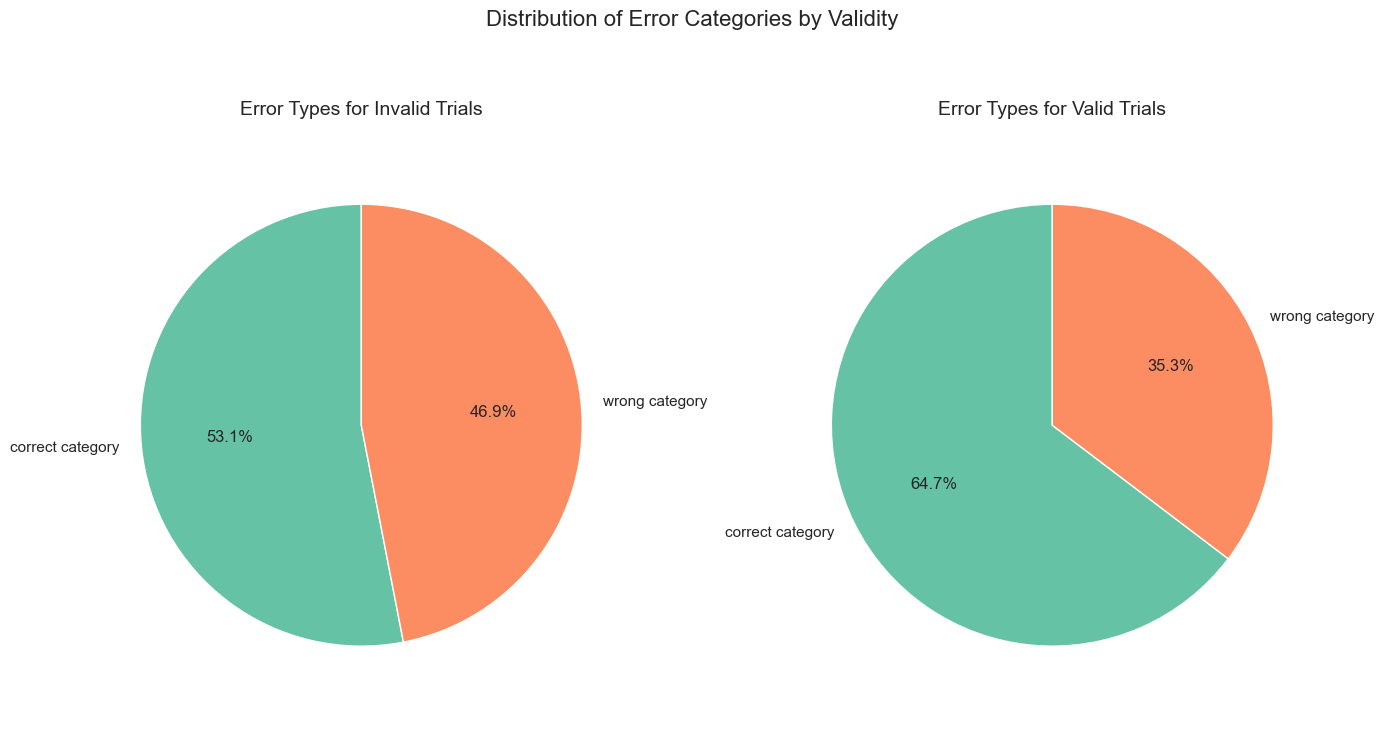


Chi-square test of independence:
Chi2 value: 110.22
p-value: 0.0000
Degrees of freedom: 1
Result: Significant association between validity and error type

Contingency table (counts):
WM Choice Category  correct category  wrong category
validity_binary                                     
0                               1546            1368
1                               3847            2102

Percentages within each validity condition:
WM Choice Category  correct category  wrong category
Tested Item                                         
deprioritized              53.054221       46.945779
prioritized                64.666330       35.333670


In [20]:

sns.set_style("whitegrid")

# Create a cross-tabulation of validity_binary vs WM Choice Category
wm_cross_tab = pd.crosstab(
    df_cleaned['Tested Item'], 
    df_cleaned['WM Choice Category'],
    normalize='index'
) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
wm_cross_tab.plot(kind='bar', colormap='Set2')
plt.title('Error Categories by Validity Condition', fontsize=15)
plt.xlabel('Validity (0=Invalid, 1=Valid)', fontsize=12)
plt.ylabel('Percentage within Validity Condition (%)', fontsize=12)
plt.legend(title='Category')
plt.xticks(rotation=0)

# Add percentage labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

# Create a side-by-side bar chart for clearer comparison
plt.figure(figsize=(10, 6))
wm_cross_tab_flipped = pd.crosstab(
    df_cleaned['WM Choice Category'],
    df_cleaned['validity_binary'],
    normalize='columns'
) * 100

# Plot grouped bars
ax = wm_cross_tab_flipped.plot(kind='bar', figsize=(10, 6))
plt.title('Error Categories by Validity Condition', fontsize=15)
plt.xlabel('Error Category', fontsize=12)
plt.ylabel('Percentage within Validity Condition (%)', fontsize=12)
plt.legend(['Invalid (0)', 'Valid (1)'], title='Validity')
plt.xticks(rotation=0)

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10)

plt.tight_layout()
plt.show()

# Create a pie chart for each validity condition
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Get data for each validity condition
for i, validity in enumerate([0, 1]):
    validity_data = df_cleaned[df_cleaned['validity_binary'] == validity]
    wm_counts = validity_data['WM Choice Category'].value_counts()
    wm_percentages = wm_counts / len(validity_data) * 100
    
    axes[i].pie(wm_percentages, labels=wm_percentages.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette("Set2", len(wm_percentages)))
    axes[i].set_title(f'Error Types for {"Invalid" if validity == 0 else "Valid"} Trials', fontsize=14)
    axes[i].axis('equal')

plt.suptitle('Distribution of Error Categories by Validity', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Statistical test: Chi-square test of independence
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_cleaned['validity_binary'], df_cleaned['WM Choice Category'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test of independence:")
print(f"Chi2 value: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Result: {'Significant association between validity and error type' if p < 0.05 else 'No significant association between validity and error type'}")

# Print the raw counts and percentages for reference
print("\nContingency table (counts):")
print(contingency_table)

print("\nPercentages within each validity condition:")
print(wm_cross_tab)

Distribution of Tested Item values:
Tested Item
prioritized      5949
deprioritized    2914
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

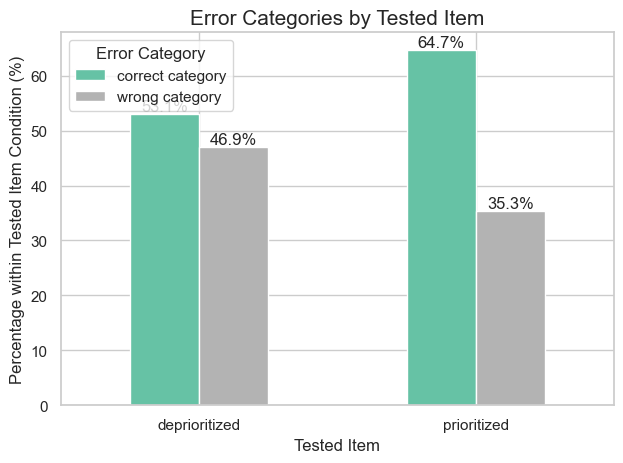

<Figure size 1000x600 with 0 Axes>

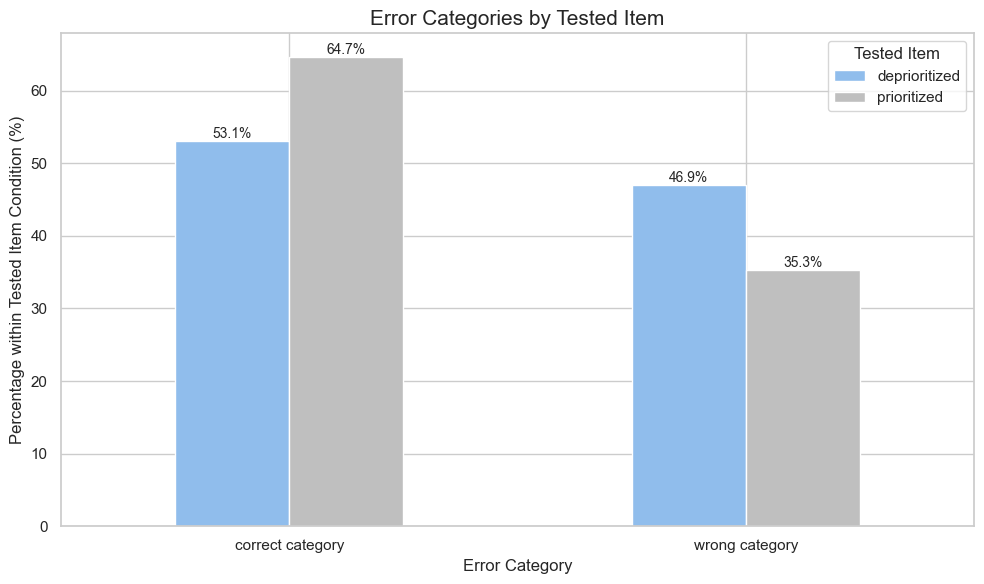

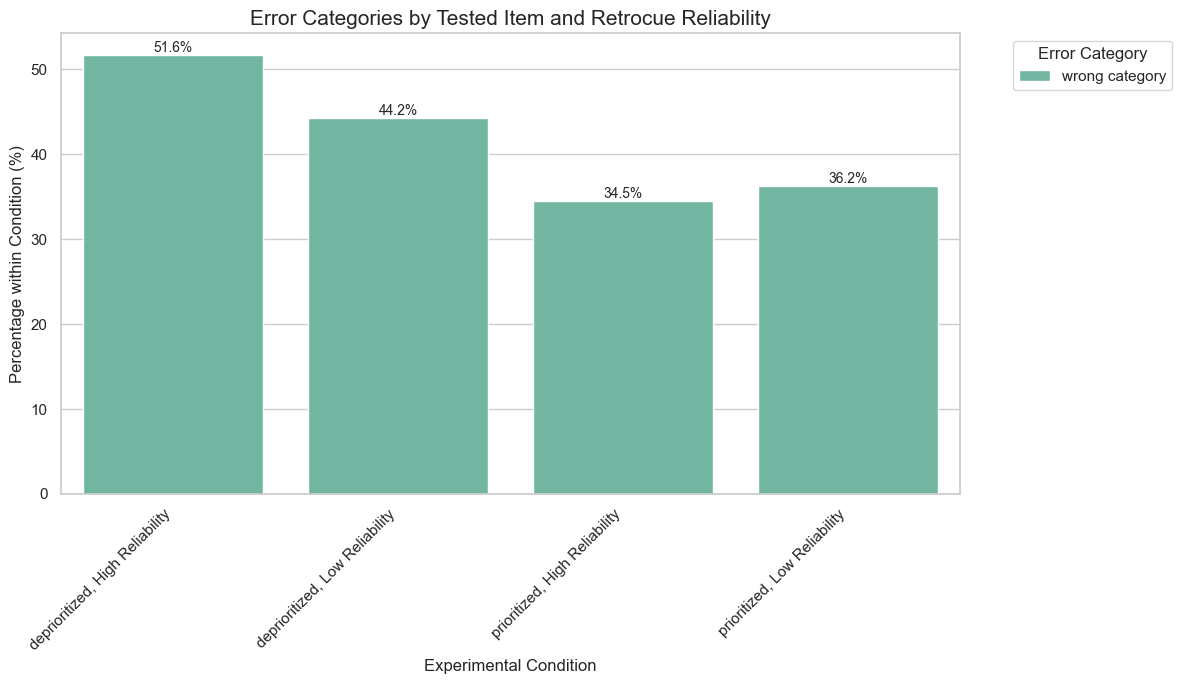

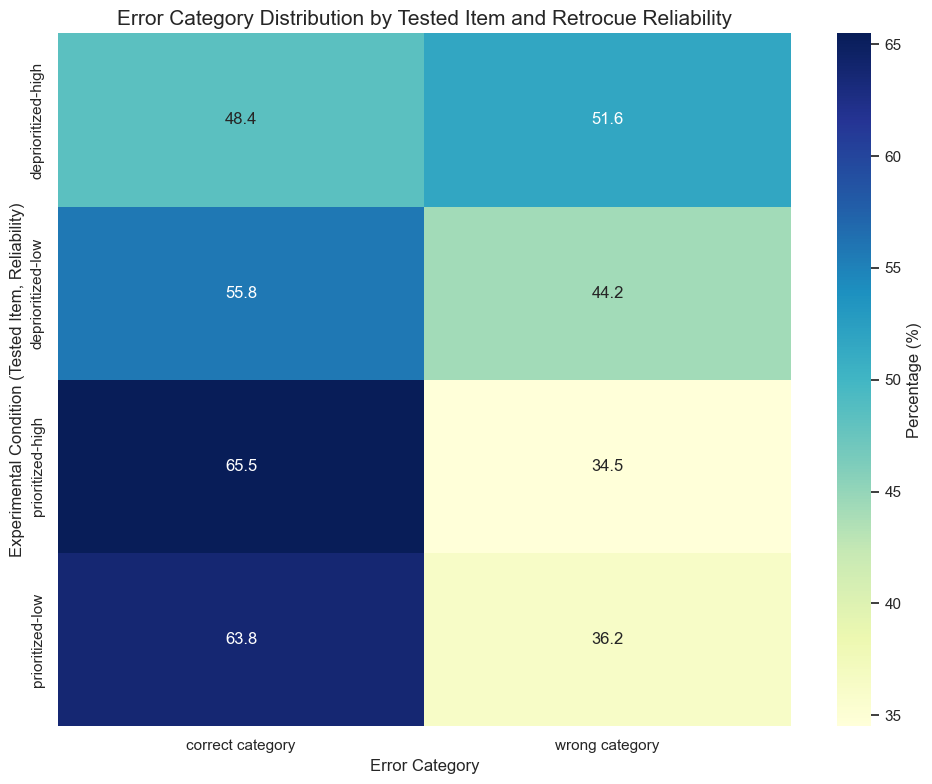

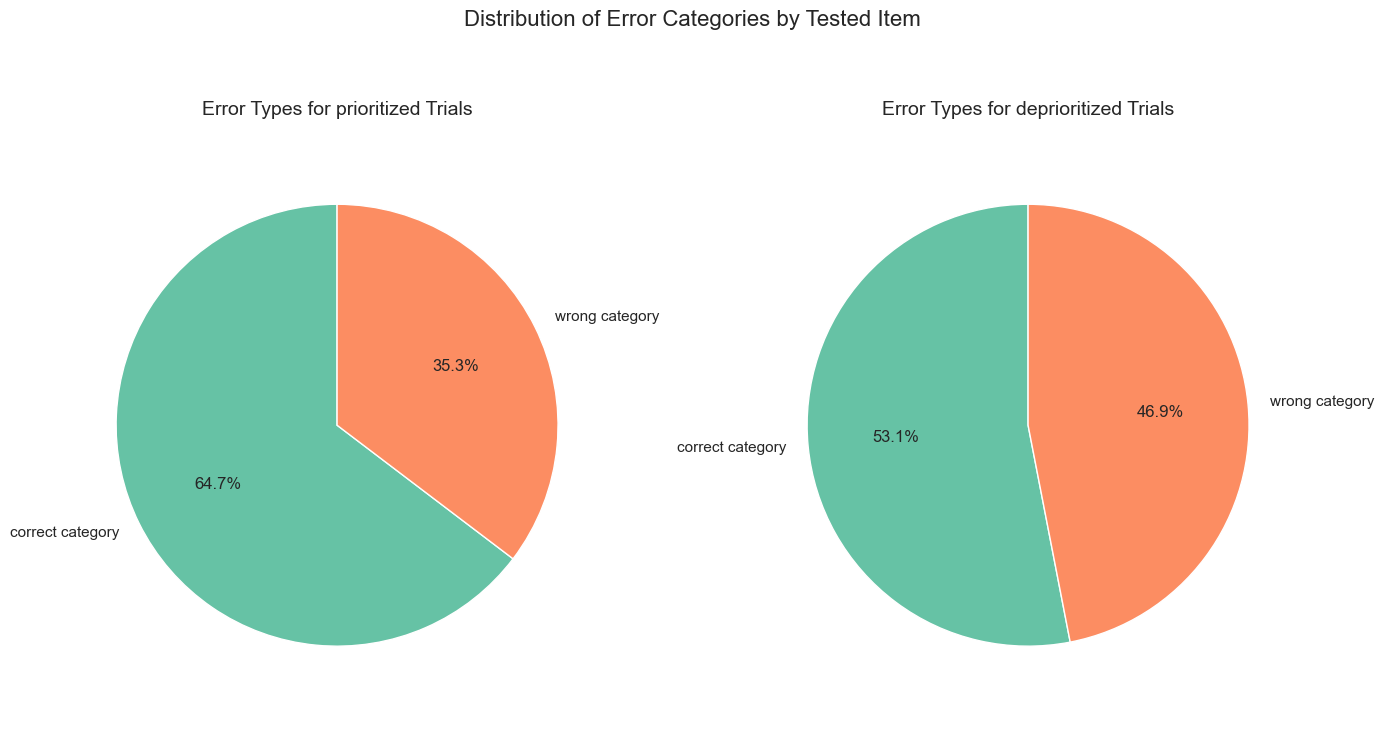


Statistical Tests:

1. Tested Item vs. Error Type:
Chi2 value: 110.22
p-value: 0.0000
Result: Significant association

2. Retrocue Reliability vs. Error Type:
Chi2 value: 0.22
p-value: 0.6413
Result: No significant association

3. Three-way contingency table (counts):
WM Choice Category                  correct category  wrong category
Tested Item   Retrocue Reliability                                  
deprioritized high                               515             550
              low                               1031             818
prioritized   high                              2036            1073
              low                               1811            1029

Percentages within each condition combination:
WM Choice Category                  correct category  wrong category
Tested Item   Retrocue Reliability                                  
deprioritized high                         48.356808       51.643192
              low                          55.759870       44

In [21]:


# Set the style for better-looking plots
sns.set_style("whitegrid")

# First, verify the values in the "Tested Item" column
tested_item_counts = df_cleaned['Tested Item'].value_counts()
print("Distribution of Tested Item values:")
print(tested_item_counts)

# Create a cross-tabulation of Tested Item vs WM Choice Category
tested_item_cross_tab = pd.crosstab(
    df_cleaned['Tested Item'], 
    df_cleaned['WM Choice Category'],
    normalize='index'
) * 100

# Create a bar chart for Tested Item
plt.figure(figsize=(10, 6))
tested_item_cross_tab.plot(kind='bar', colormap='Set2')
plt.title('Error Categories by Tested Item', fontsize=15)
plt.xlabel('Tested Item', fontsize=12)
plt.ylabel('Percentage within Tested Item Condition (%)', fontsize=12)
plt.legend(title='Error Category')
plt.xticks(rotation=0)

# Add percentage labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

# Create a side-by-side bar chart for clearer comparison
plt.figure(figsize=(10, 6))
tested_item_cross_tab_flipped = pd.crosstab(
    df_cleaned['WM Choice Category'],
    df_cleaned['Tested Item'],
    normalize='columns'
) * 100

# Plot grouped bars
ax = tested_item_cross_tab_flipped.plot(kind='bar', figsize=(10, 6))
plt.title('Error Categories by Tested Item', fontsize=15)
plt.xlabel('Error Category', fontsize=12)
plt.ylabel('Percentage within Tested Item Condition (%)', fontsize=12)
plt.legend(title='Tested Item')
plt.xticks(rotation=0)

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10)

plt.tight_layout()
plt.show()

# Create a cross-tabulation with both factors (Tested Item and Retrocue Reliability)
combined_cross_tab = pd.crosstab(
    [df_cleaned['Tested Item'], df_cleaned['Retrocue Reliability']], 
    df_cleaned['WM Choice Category'],
    normalize='index'
) * 100

# Reset the index to make it more readable
combined_cross_tab = combined_cross_tab.reset_index()
combined_cross_tab['condition'] = combined_cross_tab.apply(
    lambda x: f"{x['Tested Item']}, {'Low' if x['Retrocue Reliability'] == 'low' else 'High'} Reliability", 
    axis=1
)

# Reshape for plotting
plot_data = pd.melt(
    combined_cross_tab, 
    id_vars=['condition'], 
    value_vars=combined_cross_tab.columns[3:],
    var_name='Error Category', 
    value_name='Percentage'
)

# Create a grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='condition', y='Percentage', hue='Error Category', data=plot_data, palette='Set2')
plt.title('Error Categories by Tested Item and Retrocue Reliability', fontsize=15)
plt.xlabel('Experimental Condition', fontsize=12)
plt.ylabel('Percentage within Condition (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Error Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels
for i, p in enumerate(plt.gca().patches):
    percentage = p.get_height()
    if percentage > 5:  # Only label percentages greater than 5% for clarity
        plt.gca().annotate(f'{percentage:.1f}%', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Create a heatmap for a different visualization approach
# Prepare data for heatmap (reshape the crosstab)
heatmap_data = pd.crosstab(
    [df_cleaned['Tested Item'], df_cleaned['Retrocue Reliability']], 
    df_cleaned['WM Choice Category'],
    normalize='index'
) * 100

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage (%)'})
plt.title('Error Category Distribution by Tested Item and Retrocue Reliability', fontsize=15)
plt.ylabel('Experimental Condition (Tested Item, Reliability)', fontsize=12)
plt.xlabel('Error Category', fontsize=12)
plt.tight_layout()
plt.show()

# Create pie charts for each Tested Item condition
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Get unique values in Tested Item
tested_item_values = df_cleaned['Tested Item'].unique()

# Get data for each Tested Item condition
for i, tested_item in enumerate(tested_item_values[:2]):  # Limit to first two values if there are more
    tested_item_data = df_cleaned[df_cleaned['Tested Item'] == tested_item]
    wm_counts = tested_item_data['WM Choice Category'].value_counts()
    wm_percentages = wm_counts / len(tested_item_data) * 100
    
    axes[i].pie(wm_percentages, labels=wm_percentages.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette("Set2", len(wm_percentages)))
    axes[i].set_title(f'Error Types for {tested_item} Trials', fontsize=14)
    axes[i].axis('equal')

plt.suptitle('Distribution of Error Categories by Tested Item', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Statistical analysis: Chi-square tests
from scipy.stats import chi2_contingency

# Create contingency tables for different analyses
print("\nStatistical Tests:")

# 1. Association between Tested Item and Error Type
tested_item_table = pd.crosstab(df_cleaned['Tested Item'], df_cleaned['WM Choice Category'])
chi2_tested_item, p_tested_item, dof_tested_item, expected_tested_item = chi2_contingency(tested_item_table)
print(f"\n1. Tested Item vs. Error Type:")
print(f"Chi2 value: {chi2_tested_item:.2f}")
print(f"p-value: {p_tested_item:.4f}")
print(f"Result: {'Significant association' if p_tested_item < 0.05 else 'No significant association'}")

# 2. Association between Retrocue Reliability and Error Type
reliability_table = pd.crosstab(df_cleaned['Retrocue Reliability'], df_cleaned['WM Choice Category'])
chi2_reliability, p_reliability, dof_reliability, expected_reliability = chi2_contingency(reliability_table)
print(f"\n2. Retrocue Reliability vs. Error Type:")
print(f"Chi2 value: {chi2_reliability:.2f}")
print(f"p-value: {p_reliability:.4f}")
print(f"Result: {'Significant association' if p_reliability < 0.05 else 'No significant association'}")

# 3. Three-way contingency table analysis
# Create a three-way contingency table
three_way_table = pd.crosstab(
    [df_cleaned['Tested Item'], df_cleaned['Retrocue Reliability']], 
    df_cleaned['WM Choice Category']
)
print("\n3. Three-way contingency table (counts):")
print(three_way_table)

# Print the percentages for reference
print("\nPercentages within each condition combination:")
print(heatmap_data)

In [22]:
df['Tested Item']

0        deprioritized
1          prioritized
2          prioritized
3          prioritized
4          prioritized
             ...      
40699    deprioritized
40700      prioritized
40701    deprioritized
40702      prioritized
40703    deprioritized
Name: Tested Item, Length: 40704, dtype: object

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/903584456.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


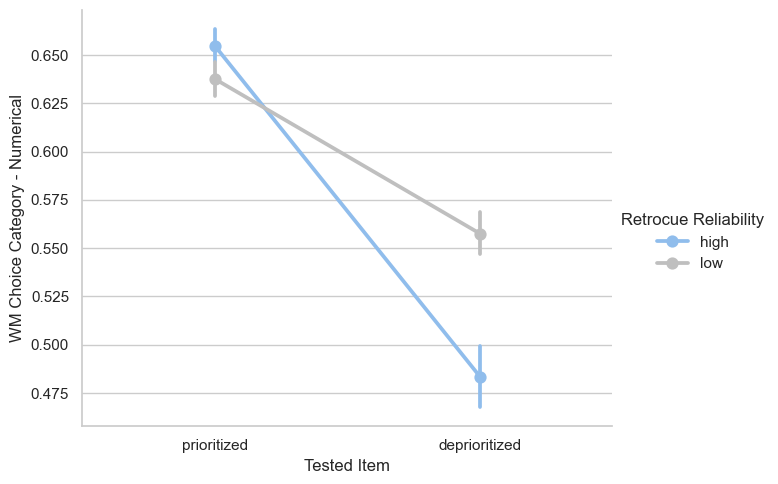

In [23]:
df_cleaned['wm_category_num'] =  np.where(
    df_cleaned['wm_category'] == "correct category", 1,0 )
df_cleaned['wm_category_num'].unique()

df_cleaned['WM Choice Category - Numerical'] = df_cleaned['wm_category_num']

g = sns.catplot(
            x = 'Tested Item',
            y='WM Choice Category - Numerical',
            hue = 'Retrocue Reliability',

            ci = 68,       
            aspect = 1.3,
            kind = 'point',
            data = df_cleaned)
# g.set(ylim=(1.5, 1.7))


In [24]:
df_cleaned['wm_category_num'] =  np.where(
    df_cleaned['wm_category'] == "correct category", 1,0 )
df_cleaned['wm_category_num'].unique()

df_cleaned['WM Choice Category - Numerical'] = df_cleaned['wm_category_num']

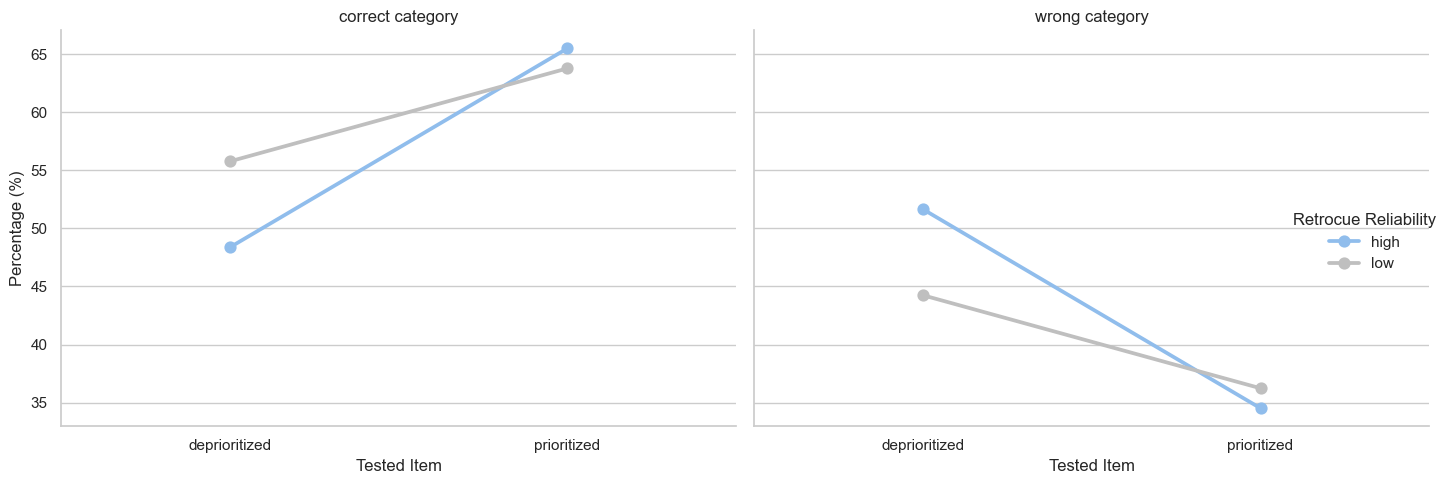

In [25]:
# Create a temporary column for counting
df_cleaned['count'] = 1

# Calculate proportions within each Tested Item and Retrocue Reliability group
prop_df = df_cleaned.groupby(['Tested Item', 'Retrocue Reliability', 'WM Choice Category'])['count'].sum().reset_index()
denominator = df_cleaned.groupby(['Tested Item', 'Retrocue Reliability'])['count'].sum().reset_index()
prop_df = prop_df.merge(denominator, on=['Tested Item', 'Retrocue Reliability'])
prop_df['proportion'] = prop_df['count_x'] / prop_df['count_y'] * 100

# Now plot with proportion as y-axis
g = sns.catplot(
    x='Tested Item',
    y='proportion',
    hue='Retrocue Reliability',
    col='WM Choice Category',  # Split by error category
    errorbar=('ci', 68),
    aspect=1.3,
    kind='point',
    data=prop_df
)

# Improve the plot
g.set_axis_labels("Tested Item", "Percentage (%)")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()



#this says in high reliability in ivalid trials they are equally choosing wrong/right category
#in low reliability valid trials they choose correct category way more often than incorrect one
# in high reliability in valid trials there is a biggest gap between the amount of chosen correct
#category vs wrong one ( 65 vs 35%)
# in low reliability valid trials the pattern is same but slightly smaller gap(63 vs 38%)


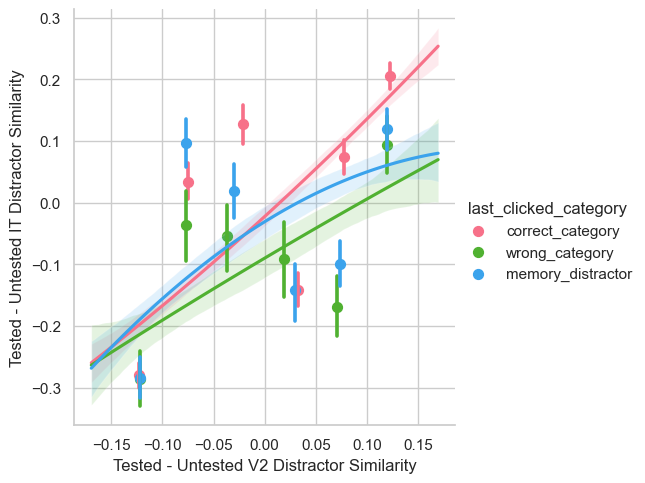

In [26]:
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Tested - Untested IT Distractor Similarity',
    hue = 'last_clicked_category',

    # hue = 'wm_category',
    # row = 'Retrocue Reliability',

    x_bins = 6,
    order = 2,
    ci = 68,
    # palette = palette[::-1],  # Reverse the color order
    data=df_cleaned
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/1971928028.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/1971928028.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


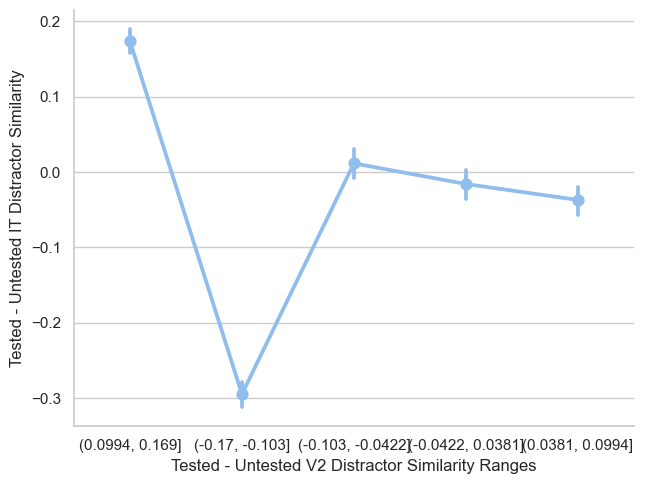

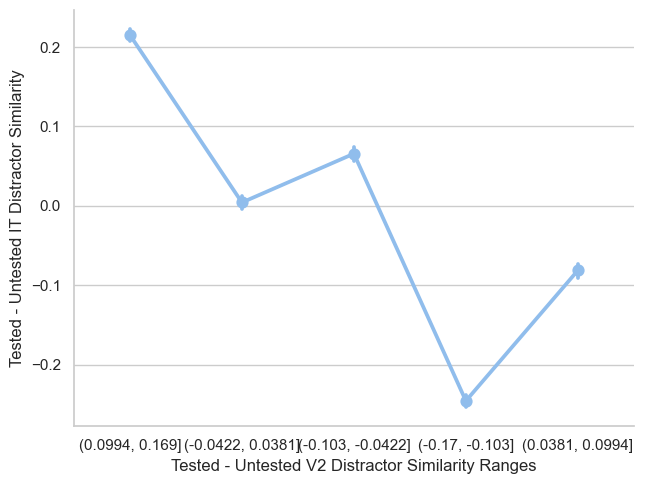

In [27]:
g = sns.catplot(
    x = 'Tested - Untested V2 Distractor Similarity Ranges',
    y='Tested - Untested IT Distractor Similarity',
    # hue = 'wm_category_num',

    ci = 68,       
    aspect = 1.3,
    kind = 'point',
    data = df_cleaned)
# g.set(ylim=(1.5, 1.7))
# plt.ylabel('Accuracy')
g = sns.catplot(
    x = 'Tested - Untested V2 Distractor Similarity Ranges',
    y='Tested - Untested IT Distractor Similarity',
    # hue = 'wm_category_num',

    ci = 68,       
    aspect = 1.3,
    kind = 'point',
    data = df)
# g.set(ylim=(1.5, 1.7))
# plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/1307704983.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/1307704983.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


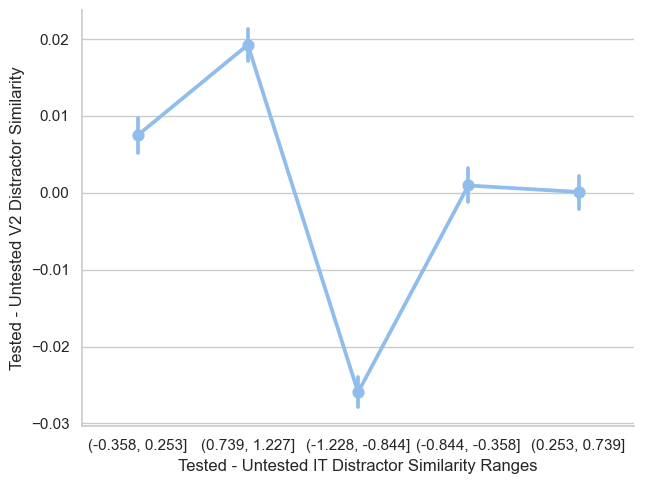

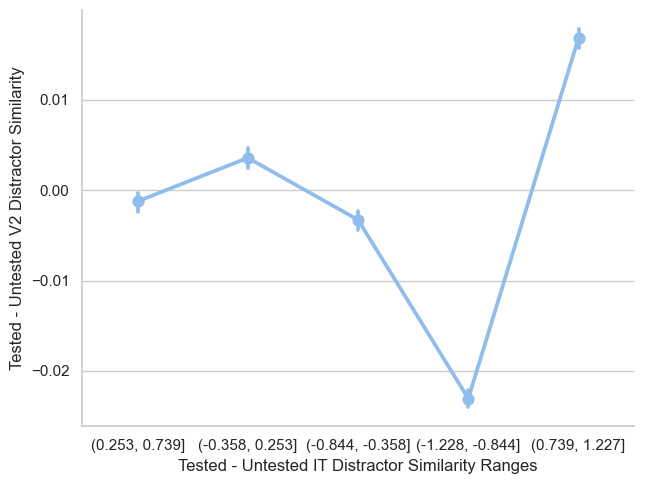

In [28]:
g = sns.catplot(
    x = 'Tested - Untested IT Distractor Similarity Ranges',
    y='Tested - Untested V2 Distractor Similarity',
    # hue = 'wm_category_num',

    ci = 68,       
    aspect = 1.3,
    kind = 'point',
    data = df[df['resp_correct'] != 1])
# g.set(ylim=(1.5, 1.7))
# plt.ylabel('Accuracy')
g = sns.catplot(
    x = 'Tested - Untested IT Distractor Similarity Ranges',
    y='Tested - Untested V2 Distractor Similarity',
    # hue = 'wm_category_num',

    ci = 68,       
    aspect = 1.3,
    kind = 'point',
    data = df)

Text(24.65625, 0.5, 'wm correct category frequency')

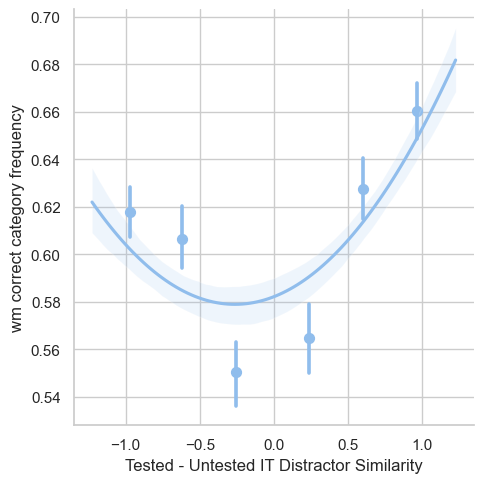

In [29]:
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='wm_category_num',
    # hue = 'Tested Item',
    # row = 'Retrocue Reliability',

    x_bins = 6,
    order = 2,
    ci = 68,
    # palette = palette[::-1],  # Reverse the color order
    data=df_cleaned
)
plt.ylabel('wm correct category frequency')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/1463608108.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(50.686328125, 0.5, 'wm correct category frequency')

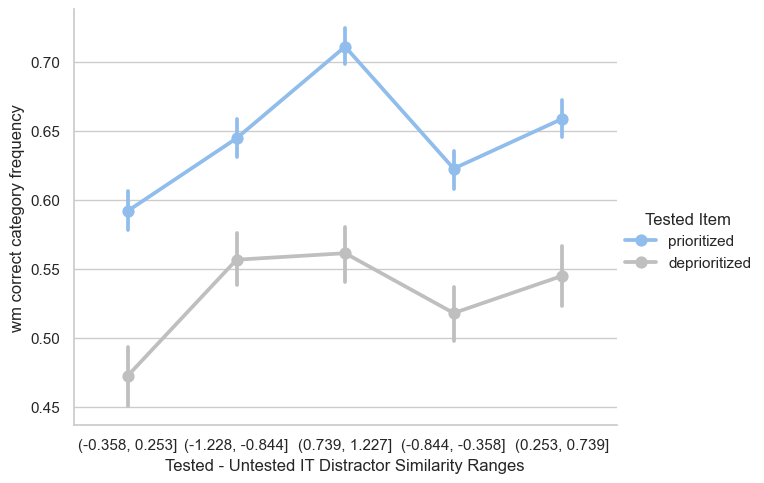

In [30]:
g = sns.catplot(
    x = 'Tested - Untested IT Distractor Similarity Ranges',
    y='wm_category_num',
    hue = 'Tested Item',

    ci = 68,       
    aspect = 1.3,
    kind = 'point',
    data = df_cleaned)
# g.set(ylim=(1.5, 1.7))
plt.ylabel('wm correct category frequency')

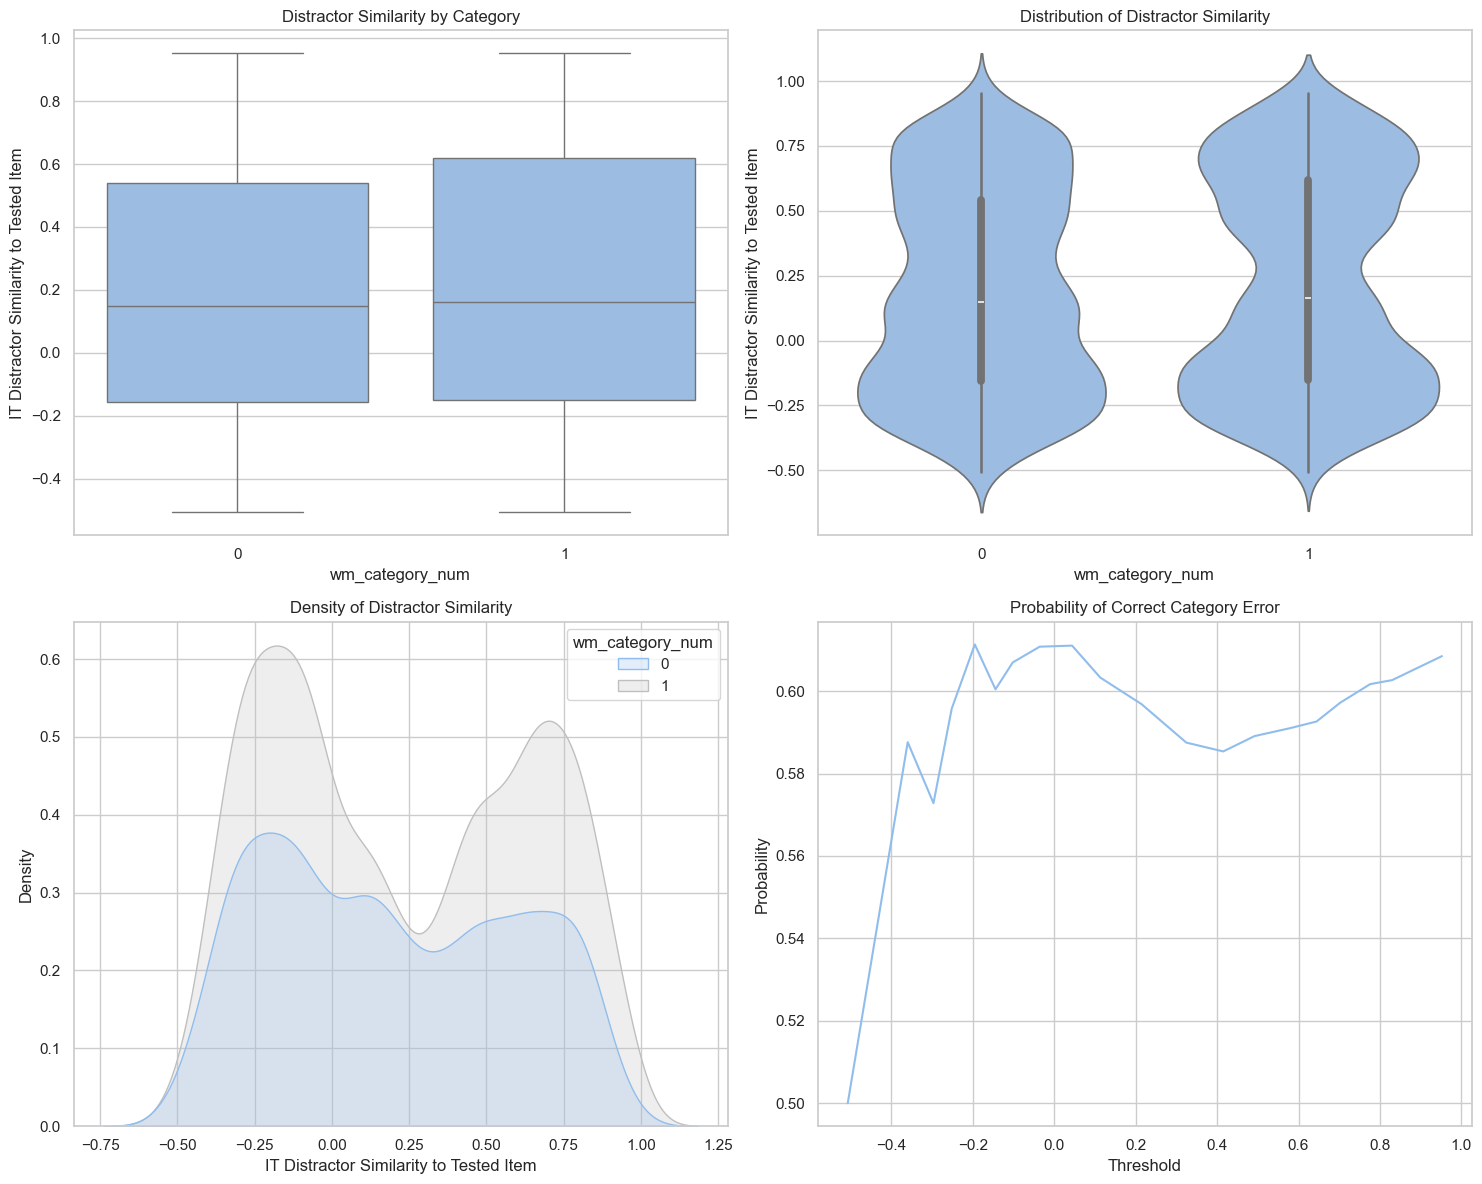

In [31]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Boxplot of similarity by category
sns.boxplot(
    x='wm_category_num', 
    y='IT Distractor Similarity to Tested Item', 
    data=df_cleaned, 
    ax=axes[0, 0]
)
axes[0, 0].set_title('Distractor Similarity by Category')

# 2. Violin plot for distribution
sns.violinplot(
    x='wm_category_num', 
    y='IT Distractor Similarity to Tested Item', 
    data=df_cleaned, 
    ax=axes[0, 1]
)
axes[0, 1].set_title('Distribution of Distractor Similarity')

# 3. Kernel Density Estimation
sns.kdeplot(
    data=df_cleaned, 
    x='IT Distractor Similarity to Tested Item', 
    hue='wm_category_num', 
    fill=True,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Density of Distractor Similarity')

# 4. Probability of category error
from scipy import stats

def bootstrap_category_prob(data, feature, category_col, n_bootstrap=1000):
    probabilities = []
    for threshold in np.percentile(data[feature], np.linspace(0, 100, 20)):
        subset = data[data[feature] <= threshold]
        prob = subset[category_col].mean()
        probabilities.append((threshold, prob))
    return pd.DataFrame(probabilities, columns=['Threshold', 'Probability'])

category_probs = bootstrap_category_prob(df_cleaned, 'IT Distractor Similarity to Tested Item', 'wm_category_num')
sns.lineplot(
    x='Threshold', 
    y='Probability', 
    data=category_probs, 
    ax=axes[1, 1]
)
axes[1, 1].set_title('Probability of Correct Category Error')

plt.tight_layout()
plt.show()

t-test: t=-2.24, p=0.0253


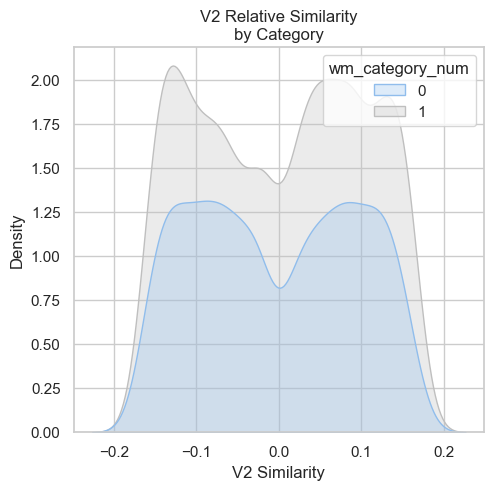

In [32]:
plt.figure(figsize=(18, 5))

# 1. Distribution of IT Distractor Similarity by Category
plt.subplot(1, 3, 1)
# Kernel Density Estimation
sns.kdeplot(
    data=df_cleaned, 
    x='Tested - Untested V2 Distractor Similarity', 
    hue='wm_category_num', 
    fill=True,
    alpha=0.3
)
plt.title('V2 Relative Similarity\nby Category')
plt.xlabel('V2 Similarity')
plt.ylabel('Density')

# Statistical test for IT Similarity between categories
cat_0_it = df_cleaned[df_cleaned['wm_category_num'] == 0]['Tested - Untested V2 Distractor Similarity']
cat_1_it = df_cleaned[df_cleaned['wm_category_num'] == 1]['Tested - Untested V2 Distractor Similarity']
t_stat, p_val = stats.ttest_ind(cat_0_it, cat_1_it)
print(f't-test: t={t_stat:.2f}, p={p_val:.4f}')


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/3324554055.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


<Figure size 1400x700 with 0 Axes>

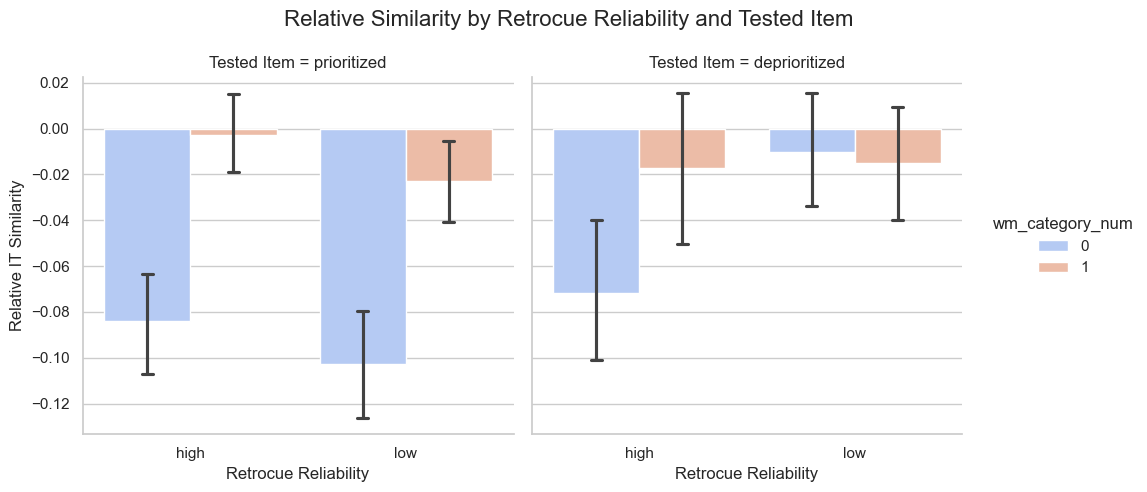

Statistical Summary:
                                                        mean       std  count
Retrocue Reliability wm_category_num Tested Item                             
high                 0               deprioritized -0.071640  0.746593    550
                                     prioritized   -0.084104  0.741401   1073
                     1               deprioritized -0.017166  0.768189    515
                                     prioritized   -0.002633  0.774279   2036
low                  0               deprioritized -0.010149  0.747254    818
                                     prioritized   -0.102701  0.751994   1029
                     1               deprioritized -0.014906  0.771762   1031
                                     prioritized   -0.022938  0.791090   1811


In [33]:

plt.figure(figsize=(14, 7))

g = sns.catplot(
   data=df_cleaned,
   x='Retrocue Reliability',
   y='Tested - Untested IT Distractor Similarity',
   hue='wm_category_num',
   col='Tested Item',
   kind='bar',
   ci=68,  # 68% confidence interval
   capsize=0.1,
   height=5,
   aspect=1,
   palette='coolwarm'
)

# Customize the plot
g.set_axis_labels('Retrocue Reliability', 'Relative IT Similarity')
# g.add_legend(title='Category')
g.fig.suptitle('Relative Similarity by Retrocue Reliability and Tested Item', fontsize=16)
g.tight_layout()

plt.show()

# Detailed statistical summary
print("Statistical Summary:")
summary = df_cleaned.groupby(['Retrocue Reliability', 'wm_category_num', 'Tested Item'])['Tested - Untested IT Distractor Similarity'].agg(['mean', 'std', 'count'])
print(summary)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/3584832393.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


<Figure size 1400x700 with 0 Axes>

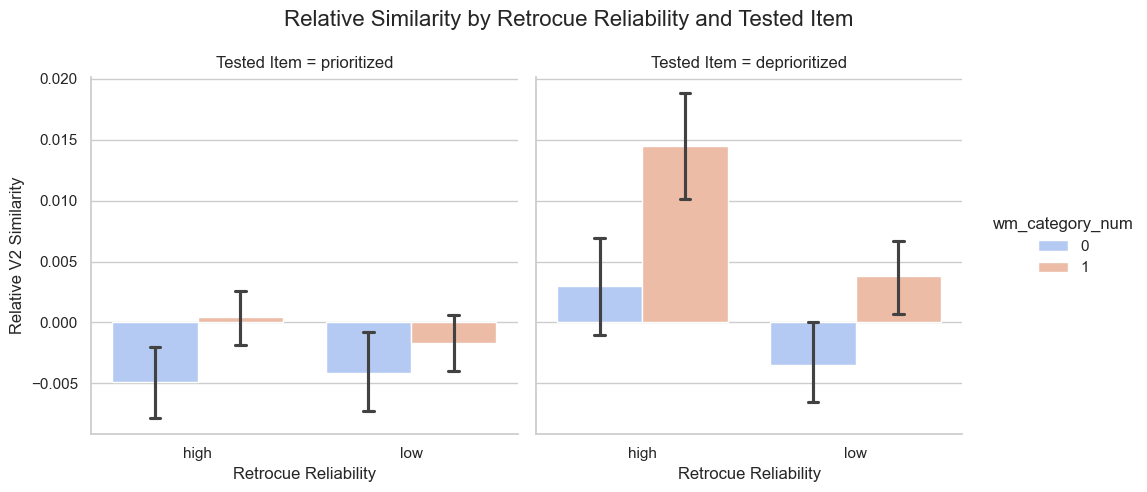

Statistical Summary:
                                                        mean       std  count
Retrocue Reliability wm_category_num Tested Item                             
high                 0               deprioritized  0.003002  0.096967    550
                                     prioritized   -0.004931  0.095994   1073
                     1               deprioritized  0.014516  0.099338    515
                                     prioritized    0.000454  0.099420   2036
low                  0               deprioritized -0.003491  0.096871    818
                                     prioritized   -0.004116  0.098499   1029
                     1               deprioritized  0.003843  0.100152   1031
                                     prioritized   -0.001730  0.099340   1811


In [34]:

plt.figure(figsize=(14, 7))

g = sns.catplot(
   data=df_cleaned,
   x='Retrocue Reliability',
   y='Tested - Untested V2 Distractor Similarity',
   hue='wm_category_num',
   col='Tested Item',
   kind='bar',
   ci=68,  # 68% confidence interval
   capsize=0.1,
   height=5,
   aspect=1,
   palette='coolwarm'
)

# Customize the plot
g.set_axis_labels('Retrocue Reliability', 'Relative V2 Similarity')
# g.add_legend(title='Category')
g.fig.suptitle('Relative Similarity by Retrocue Reliability and Tested Item', fontsize=16)
g.tight_layout()

plt.show()

# Detailed statistical summary
print("Statistical Summary:")
summary = df_cleaned.groupby(['Retrocue Reliability', 'wm_category_num', 'Tested Item'])['Tested - Untested V2 Distractor Similarity'].agg(['mean', 'std', 'count'])
print(summary)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_35079/567598896.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


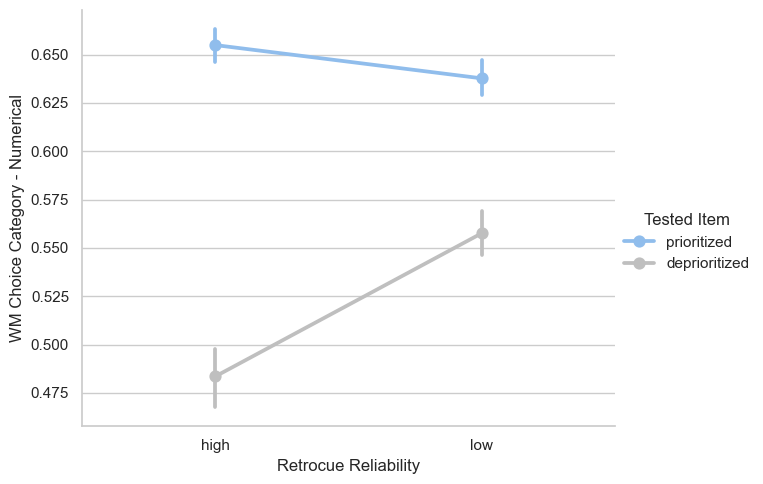

In [35]:
g = sns.catplot(
            x = 'Retrocue Reliability',
            y='WM Choice Category - Numerical',
            hue = 'Tested Item',

            ci = 68,       
            aspect = 1.3,
            kind = 'point',
            palette = palette,
            data = df_cleaned)

In [36]:
# sns.set_style("white")

# g = sns.lmplot(
#     x='Tested - Untested IT Distractor Similarity',
#     y='wm_category_num',
#     col='it_pos_neg',
#     hue = 'Tested Item',
#     # row = 'Retrocue Reliability',
#     facet_kws={'sharex': False}, 
#     x_bins = 3,
#     order = 2,
#     ci = 68,
#     aspect = 0.7,
#     data=df_cleaned
# )
# g.axes[0,1].yaxis.set_visible(False)
# g.axes[0,1].spines['left'].set_visible(False)
# g.axes[0,1].set_xlabel('')
# handles, labels = g.axes[0,0].get_legend_handles_labels()
# # g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), 
# #              bbox_to_anchor=(0.5, -0.15), frameon=True)
# plt.tight_layout()
# plt.subplots_adjust(bottom=0.2)  
# plt.show()

In [37]:
# !pip uninstall seaborn -y
# !pip install seaborn==0.13.2

Text(53.5597265625, 0.5, 'wm correct category frequency')

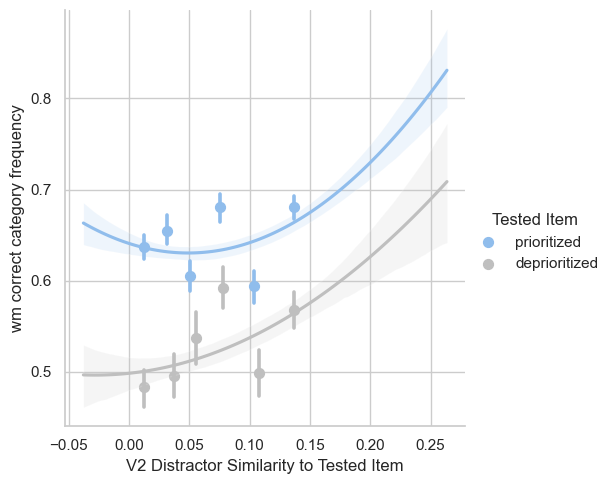

In [38]:
sns.lmplot(
    x="V2 Distractor Similarity to Tested Item",
    y='wm_category_num',
    hue = 'Tested Item',
    # row = 'Retrocue Reliability',

    x_bins = 6,
    order = 2,
    ci = 68,
    # palette = palette[::-1],  # Reverse the color order
    data=df_cleaned
)
plt.ylabel('wm correct category frequency')

Total points: 8863, Window size: 1772, Step size: 177


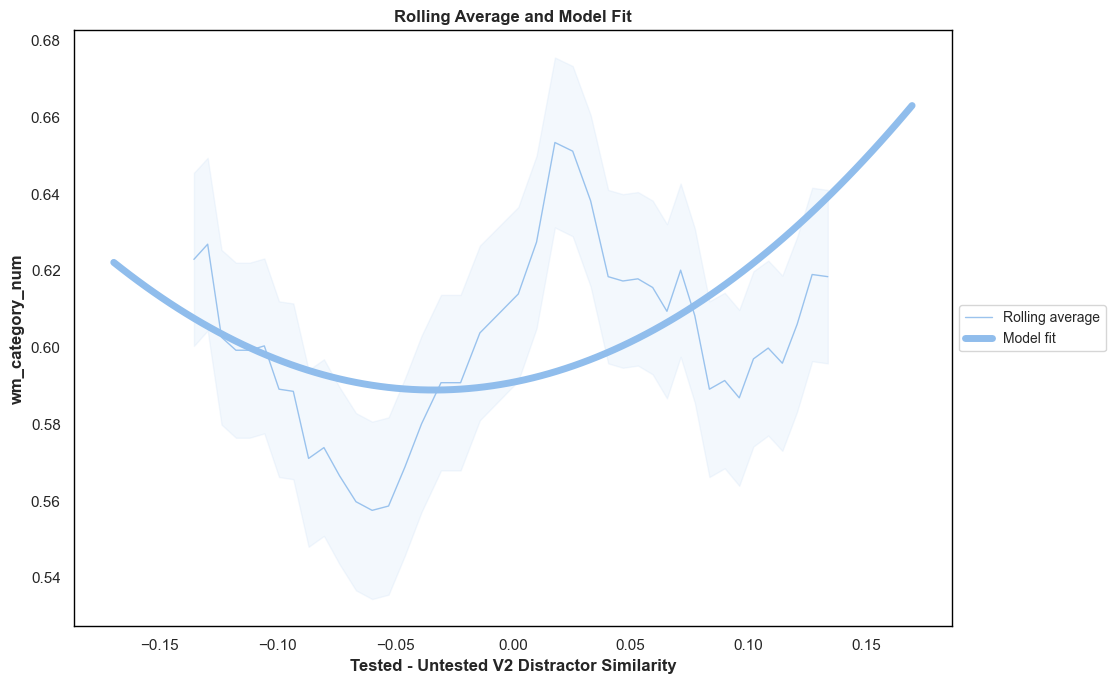

In [39]:
combined_plot = combined_rolling_average_and_model_fit(
    df_cleaned, 
    x_col="Tested - Untested V2 Distractor Similarity",
    y_col="wm_category_num",
    # item_col="Tested Item",  # Can be None to avoid splitting
    window_percent=0.2,
    step_percent=0.02,
    palette=palette
)

# Show the plot
plt.show()

Negative side - All Data, Total points: 4375, Window size: 875, Step size: 87
Positive side - All Data, Total points: 4488, Window size: 897, Step size: 89


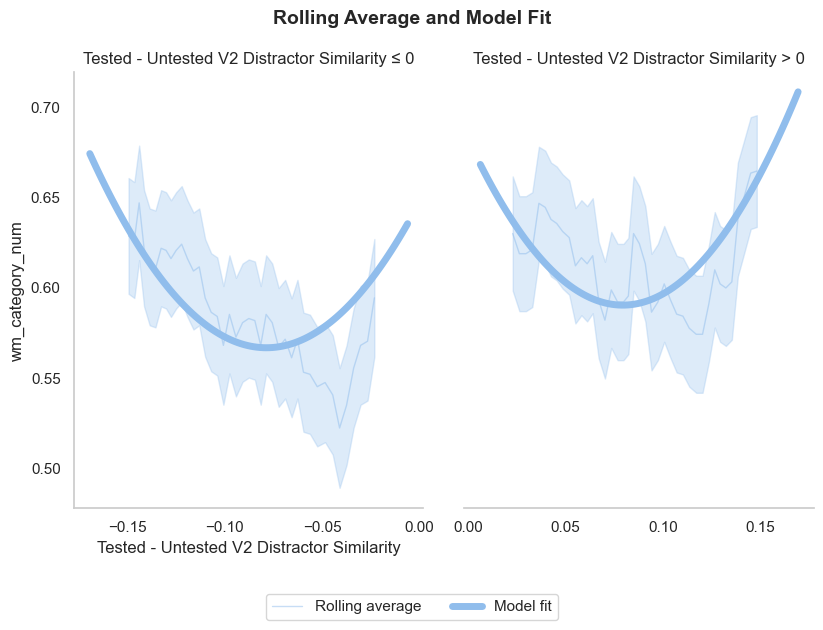

In [40]:
fig2 = combined_sliding_window_and_model_fit_split_col(
    df_cleaned, 
    x_col="Tested - Untested V2 Distractor Similarity",
    y_col="wm_category_num", 
    item_col=None,  # No grouping by item
    # split_col="V2_pos_neg",
    split_value=0,
    window_percent=0.2, 
    step_percent=0.02,
    palette=['#90BDEC', '#BFBFBF']  # Your custom palette
)

plt.show()

In [44]:
df_cleaned['wm_category_num']

0       1
1       0
2       1
3       0
4       0
       ..
8858    1
8859    0
8860    1
8861    1
8862    0
Name: wm_category_num, Length: 8863, dtype: int64

In [42]:
df_cleaned.to_csv('pilot6_errors.csv', index=False)


In [43]:
len(set(df_cleaned['participant']))

136